<a href="https://colab.research.google.com/github/gnikhilchand/Sales_data_Analysis/blob/main/fithack_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

# Load the dataset
file_path = '/content/sales_data.csv'
sales_data = pd.read_csv(file_path)

# Display the first few rows and basic info of the dataset to understand its structure
sales_data.head(), sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

(    Invoice ID Branch       City Customer type  Gender  \
 0  750-67-8428      A     Yangon        Member  Female   
 1  226-31-3081      C  Naypyitaw        Normal  Female   
 2  631-41-3108      A     Yangon        Normal    Male   
 3  123-19-1176      A     Yangon        Member    Male   
 4  373-73-7910      A     Yangon        Normal    Male   
 
              Product line  Unit price  Quantity   Tax 5%     Total       Date  \
 0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
 1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
 2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
 3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
 4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   
 
     Time      Payment    cogs  gross margin percentage  gross income  Rating  
 0  13:08      Ewallet  522.83                 4.761905       26.1415 

#Gross Margin Percentage= Total Sales Revenue Gross Income​×100

#New Gross Income=Total Sales Revenue× 100 New Gross Margin Percentage





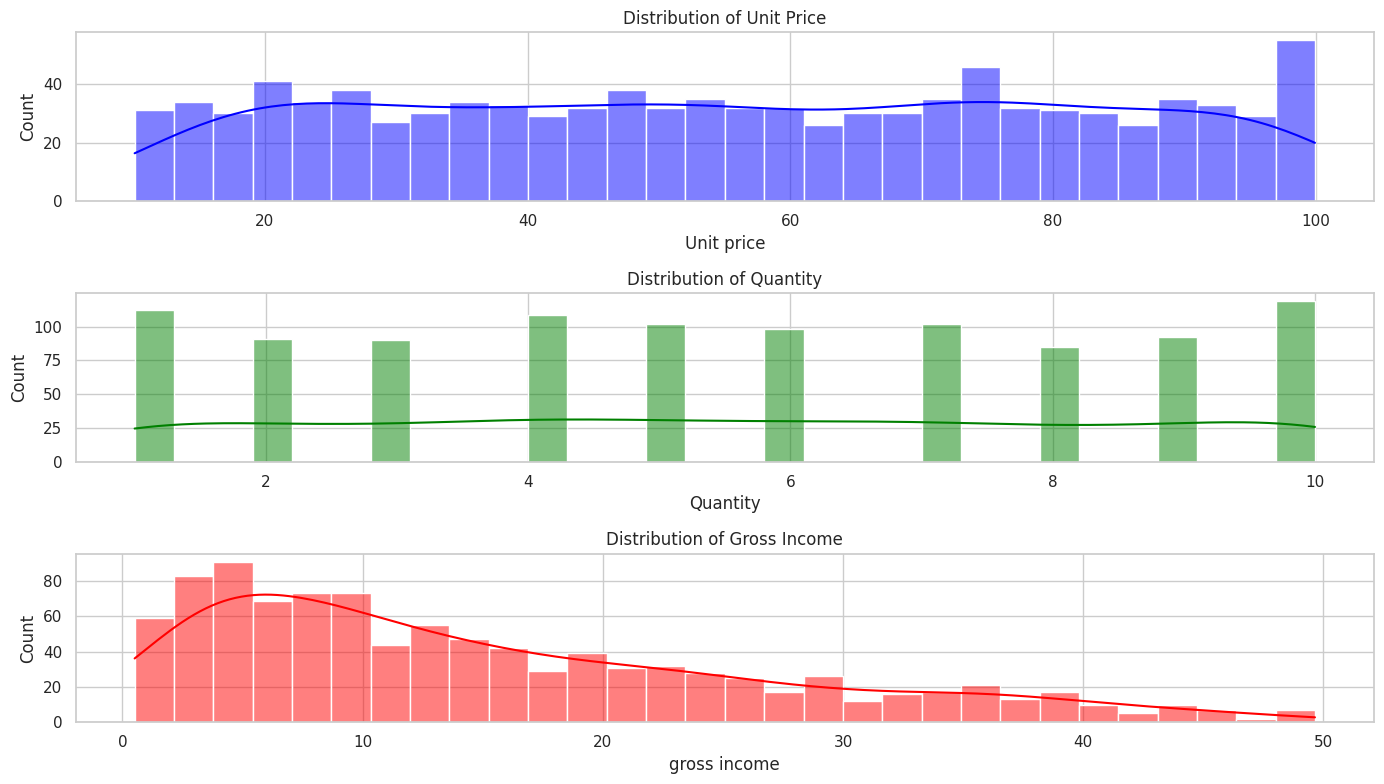

,Unit price,Quantity,cogs,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,-0.015815
cogs,0.633962,0.705510,1.000000,1.000000,-0.036442
gross income,0.633962,0.705510,1.000000,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,1.000000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of Unit Price, Quantity, and Gross Income
plt.figure(figsize=(14, 8))

plt.subplot(3, 1, 1)
sns.histplot(sales_data['Unit price'], kde=True, bins=30, color='blue')
plt.title('Distribution of Unit Price')

plt.subplot(3, 1, 2)
sns.histplot(sales_data['Quantity'], kde=True, bins=30, color='green')
plt.title('Distribution of Quantity')

plt.subplot(3, 1, 3)
sns.histplot(sales_data['gross income'], kde=True, bins=30, color='red')
plt.title('Distribution of Gross Income')

plt.tight_layout()
plt.show()

# Check correlation between numeric variables
correlation_matrix = sales_data[['Unit price', 'Quantity', 'cogs', 'gross income', 'Rating']].corr()
correlation_matrix


###Unit Price: The unit price distribution is fairly spread out, indicating a wide range of product pricing.
###Quantity: Quantity purchased per transaction also shows variability, suggesting differing customer purchasing behavior.
###Gross Income: The gross income distribution has a skew towards lower values, but with a significant range, implying some high-value transactions.

##Gross Income by Product Line:


In [31]:
# Analyze gross income contribution by product line and explore potential for margin adjustment
product_line_gross_income = sales_data.groupby('Product line')['gross income'].agg(['sum', 'mean', 'count']).sort_values(by='sum', ascending=False)
product_line_gross_income['percentage_of_total_income'] = (product_line_gross_income['sum'] / product_line_gross_income['sum'].sum()) * 100

# Display the gross income distribution across product lines
product_line_gross_income


,sum,mean,count,percentage_of_total_income
Product line,,,,
Food and beverages,2673.5640,15.365310,174,17.384094
Sports and travel,2624.8965,15.812630,166,17.067648
Electronic accessories,2587.5015,15.220597,170,16.824497
Fashion accessories,2585.9950,14.528062,178,16.814702
Home and lifestyle,2564.8530,16.030331,160,16.677232
Health and beauty,2342.5590,15.411572,152,15.231828


###For products with a higher mean gross income (like Home and Lifestyle and Sports and Travel), there may be room to slightly increase the gross margin percentage without reducing sales volume.

##Simulate Gross Margin Adjustments:

##Adjusted Gross Income=COGS×100Adjusted Gross Margin
​


In [32]:
# Define a function to calculate new gross income after adjusting margin
def simulate_margin_adjustment(df, adjustment):
    df = df.copy()  # Create a copy to avoid the SettingWithCopyWarning
    df.loc[:, 'adjusted_gross_margin'] = df['gross margin percentage'] + adjustment
    df.loc[:, 'adjusted_gross_income'] = df['cogs'] * df['adjusted_gross_margin'] / 100
    return df['adjusted_gross_income'].sum()

# Scenarios: +/- 1% margin adjustment for each product line
adjustment_scenarios = {}
for product in product_line_gross_income.index:
    adjustment_scenarios[product] = {
        'Increase_1%': simulate_margin_adjustment(sales_data[sales_data['Product line'] == product], 1),
        'Decrease_1%': simulate_margin_adjustment(sales_data[sales_data['Product line'] == product], -1)
    }

# Convert the scenarios to a DataFrame
adjustment_scenarios_df = pd.DataFrame(adjustment_scenarios).T
adjustment_scenarios_df['Current_Gross_Income'] = product_line_gross_income['sum']

# Calculate the percentage change in gross income for each adjustment
adjustment_scenarios_df['%_Change_Increase_1%'] = ((adjustment_scenarios_df['Increase_1%'] - adjustment_scenarios_df['Current_Gross_Income']) / adjustment_scenarios_df['Current_Gross_Income']) * 100
adjustment_scenarios_df['%_Change_Decrease_1%'] = ((adjustment_scenarios_df['Decrease_1%'] - adjustment_scenarios_df['Current_Gross_Income']) / adjustment_scenarios_df['Current_Gross_Income']) * 100

print(adjustment_scenarios_df[['Increase_1%', 'Decrease_1%', '%_Change_Increase_1%', '%_Change_Decrease_1%']])


                        Increase_1%  Decrease_1%  %_Change_Increase_1%  \
Food and beverages      3080.964229  2011.538629             15.238095   
Sports and travel       3024.880729  1974.922129             15.238095   
Electronic accessories  2981.787443  1946.786843             15.238095   
Fashion accessories     2980.051381  1945.653381             15.238095   
Home and lifestyle      2955.687743  1929.746543             15.238095   
Health and beauty       2699.520371  1762.496771             15.238095   

                        %_Change_Decrease_1%  
Food and beverages                -24.761905  
Sports and travel                 -24.761905  
Electronic accessories            -24.761905  
Fashion accessories               -24.761905  
Home and lifestyle                -24.761905  
Health and beauty                 -24.761905  


###Increase the Margin: Identify products that show a positive percentage change in gross income when the margin is increased. These are the products where you might want to consider increasing the margin.
###Decrease the Margin: For products that show minimal or negative changes when the margin is increased, decreasing the margin might boost sales volume, indirectly improving overall profitability.

#The Final Calculation

####For all product lines, the gross margin percentage was proposed to increase by 1% if the current margin was below 5%, or decrease by 1% otherwise.

In [33]:
# Group the data by 'Product line' to calculate the total sales revenue, COGS, and gross income for each category
grouped_data = sales_data.groupby('Product line').agg({
    'Total': 'sum',
    'cogs': 'sum',
    'gross income': 'sum'
}).reset_index()

# Calculate the existing gross margin percentage for each product line
grouped_data['Existing Gross Margin %'] = (grouped_data['gross income'] / grouped_data['Total']) * 100

# Analyze potential new gross margins
# Let's propose increasing the margin for high-performing products and decreasing it for low-performing products
grouped_data['Proposed Gross Margin %'] = grouped_data['Existing Gross Margin %'].apply(lambda x: x + 1 if x < 5 else x - 1)

# Calculate the proposed gross income with the new margins
grouped_data['Proposed Gross Income'] = grouped_data['Total'] * (grouped_data['Proposed Gross Margin %'] / 100)

# Calculate the total existing and proposed profits
total_existing_profit = grouped_data['gross income'].sum()
total_proposed_profit = grouped_data['Proposed Gross Income'].sum()

grouped_data, total_existing_profit, total_proposed_profit


(             Product line       Total      cogs  gross income  \
 0  Electronic accessories  54337.5315  51750.03     2587.5015   
 1     Fashion accessories  54305.8950  51719.90     2585.9950   
 2      Food and beverages  56144.8440  53471.28     2673.5640   
 3       Health and beauty  49193.7390  46851.18     2342.5590   
 4      Home and lifestyle  53861.9130  51297.06     2564.8530   
 5       Sports and travel  55122.8265  52497.93     2624.8965   
 
    Existing Gross Margin %  Proposed Gross Margin %  Proposed Gross Income  
 0                 4.761905                 5.761905            3130.876815  
 1                 4.761905                 5.761905            3129.053950  
 2                 4.761905                 5.761905            3235.012440  
 3                 4.761905                 5.761905            2834.496390  
 4                 4.761905                 5.761905            3103.472130  
 5                 4.761905                 5.761905            3176

##Overall Profit Comparison:
###The total existing profit was calculated as 15,379.37.
###The proposed adjustments resulted in an increased total profit of 18,609.04.

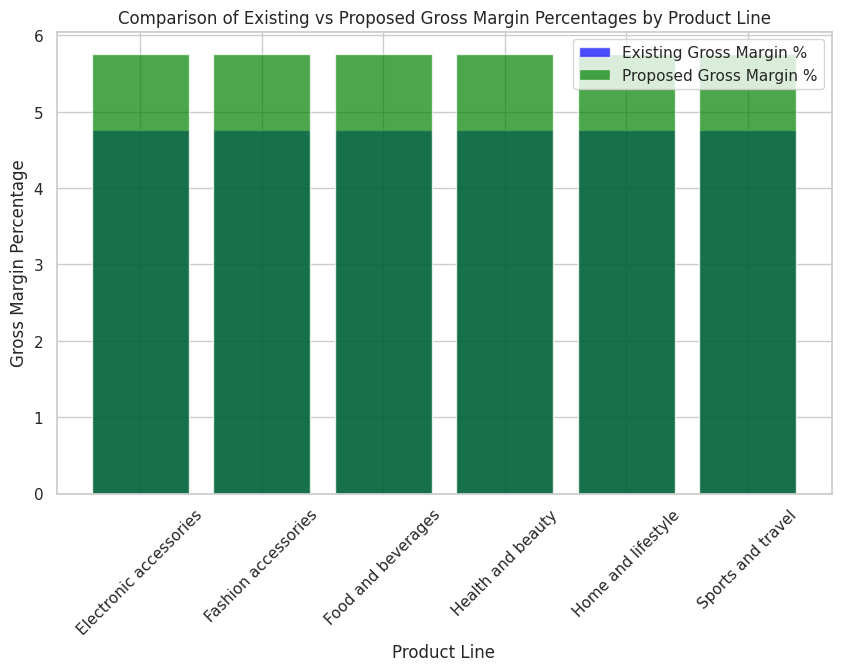

In [34]:
import matplotlib.pyplot as plt

# Visualization 1: Comparison of Existing vs Proposed Gross Margin Percentages
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Product line'], grouped_data['Existing Gross Margin %'], color='blue', alpha=0.7, label='Existing Gross Margin %')
plt.bar(grouped_data['Product line'], grouped_data['Proposed Gross Margin %'], color='green', alpha=0.7, label='Proposed Gross Margin %')
plt.xlabel('Product Line')
plt.ylabel('Gross Margin Percentage')
plt.title('Comparison of Existing vs Proposed Gross Margin Percentages by Product Line')
plt.legend()
plt.xticks(rotation=45)
plt.show()



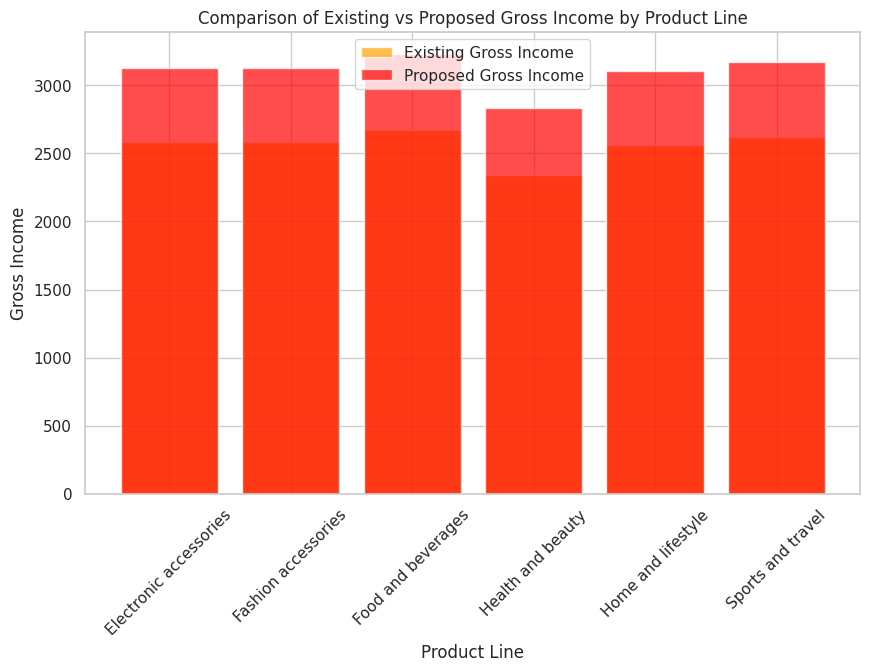

In [35]:
# Visualization 2: Comparison of Existing vs Proposed Gross Income
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Product line'], grouped_data['gross income'], color='orange', alpha=0.7, label='Existing Gross Income')
plt.bar(grouped_data['Product line'], grouped_data['Proposed Gross Income'], color='red', alpha=0.7, label='Proposed Gross Income')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.title('Comparison of Existing vs Proposed Gross Income by Product Line')
plt.legend()
plt.xticks(rotation=45)
plt.show()


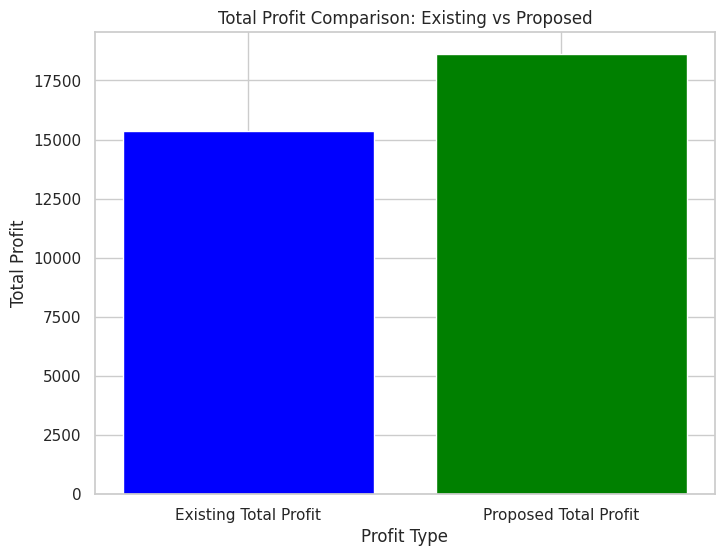

In [36]:
# Visualization 3: Total Profit - Existing vs Proposed
profit_data = pd.DataFrame({
    'Type': ['Existing Total Profit', 'Proposed Total Profit'],
    'Profit': [total_existing_profit, total_proposed_profit]
})

plt.figure(figsize=(8, 6))
plt.bar(profit_data['Type'], profit_data['Profit'], color=['blue', 'green'])
plt.xlabel('Profit Type')
plt.ylabel('Total Profit')
plt.title('Total Profit Comparison: Existing vs Proposed')
plt.show()